### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(font_scale = 1.2)
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
scaler = MinMaxScaler()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Loading train and test data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df_train = pd.read_csv('train.csv')
df_train.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [4]:
df_train.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [5]:
df_test=pd.read_csv('test.csv')
df_test.describe()

,ID,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,7259.500000,11.500000,13.035300,57.966000,1.727933,1366.005333,4.103667,0.562940,0.174733,0.130300
std,866.169729,6.923341,12.026752,21.330288,1.013826,643.374688,13.170840,0.866555,1.223086,0.592634
min,5760.000000,0.000000,-17.800000,0.000000,0.000000,33.000000,-30.600000,0.000000,0.000000,0.000000
25%,6509.750000,5.750000,3.900000,40.000000,0.900000,779.000000,-3.900000,0.000000,0.000000,0.000000
50%,7259.500000,11.500000,13.950000,58.000000,1.500000,1591.500000,4.900000,0.010000,0.000000,0.000000
75%,8009.250000,17.250000,22.900000,76.000000,2.400000,2000.000000,15.600000,0.910000,0.000000,0.000000
max,8759.000000,23.000000,38.000000,98.000000,6.900000,2000.000000,26.800000,3.520000,29.500000,8.800000


### Real values

In [6]:
df_test_private=pd.read_csv('SeoulBikeData.csv')
df_test_private

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
d1= df_test[['Date','Hour']]
d2=df_test_private[['Date','Hour','y']]

In [8]:
d1

,Date,Hour
0,21/12/2017,0
1,21/12/2017,1
2,21/12/2017,2
3,21/12/2017,3
4,21/12/2017,4
...,...,...
2995,30/11/2018,19
2996,30/11/2018,20
2997,30/11/2018,21
2998,30/11/2018,22


In [9]:
d2

,Date,Hour,y
0,1/12/2017,0,254
1,1/12/2017,1,204
2,1/12/2017,2,173
3,1/12/2017,3,107
4,1/12/2017,4,78
...,...,...,...
8755,30/11/2018,19,1003
8756,30/11/2018,20,764
8757,30/11/2018,21,694
8758,30/11/2018,22,712


In [10]:
mergetest = pd.merge(d1,d2,how='left',on=['Date','Hour'])
mergetest

,Date,Hour,y
0,21/12/2017,0,166
1,21/12/2017,1,189
2,21/12/2017,2,132
3,21/12/2017,3,79
4,21/12/2017,4,58
...,...,...,...
2995,30/11/2018,19,1003
2996,30/11/2018,20,764
2997,30/11/2018,21,694
2998,30/11/2018,22,712


In [11]:
p=mergetest[['y']].copy()
p

,y
0,166
1,189
2,132
3,79
4,58
...,...
2995,1003
2996,764
2997,694
2998,712


In [12]:
p.shape

(3000, 1)

In [13]:
# df_train['y']= df_train['y'][df_train['y']>0].apply(lambda x:np.log(x))

In [14]:
# df_train['y'][df_train['y']>df_train['y'].quantile(0.02)].hist(bins=20)

### Exploratory data analysis

In [15]:
df_train.isna().sum()

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [16]:
df_test.isna().sum()

ID                           0
Date                         0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'Hour'}>],
       [<AxesSubplot:title={'center':'Temperature(�C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>],
       [<AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(�C)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>, <AxesSubplot:>]],
      dtype=object)

C:\Users\mady\anaconda3\envs\mywork\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mady\anaconda3\envs\mywork\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


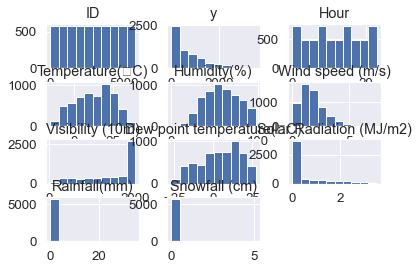

In [17]:
df_train.hist()

In [18]:
table=pd.crosstab(df_train['Holiday'],df_train['Functioning Day'])

In [19]:
table

Functioning Day,No,Yes
Holiday,,
Holiday,24,216
No Holiday,223,5297


##### Removing zeros from train_data y column

In [20]:
# df_train= df_train[df_train['y']>0]

In [21]:
df_train.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


### Concatenation of train and test data to preprocess them in one shot

In [22]:
y=df_train['y'].copy()
df_train.drop(['y'],axis='columns',inplace=True)
df_train['y']=y

In [23]:
df_train.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'y'],
      dtype='object')

In [24]:
df_test.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [25]:
data_all = pd.concat((df_train,df_test),ignore_index=True)

In [26]:
data_all

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,y
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254.0
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204.0
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173.0
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107.0
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN
8756,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN
8757,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN
8758,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN


In [27]:
data_all["Date"] = pd.to_datetime(data_all["Date"],format="%d/%m/%Y")
data_all[['Date']]

,Date
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01
...,...
8755,2018-11-30
8756,2018-11-30
8757,2018-11-30
8758,2018-11-30


In [28]:
# data_all.sort_values(by=['Date','Hour'],inplace=True,ignore_index=True)
# data_all

In [29]:
data_all['day']=data_all["Date"].dt.day_name()
data_all['month']=data_all["Date"].dt.month

# data_all['dayofweek'] = data_all['Date'].dt.dayofweek
# data_all['quarter'] = data_all['Date'].dt.quarter
# data_all['dayofyear'] = data_all['Date'].dt.dayofyear
# data_all['dayofmonth'] = data_all['Date'].dt.day
# data_all['weekofyear'] = data_all['Date'].dt.weekofyear

In [30]:
data_all['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in data_all['Hour']]
data_all['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in data_all['Hour']]

In [31]:
data_all

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,y,day,month,day_cos,day_sin
0,0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254.0,Friday,12,1.000000,0.000000
1,1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204.0,Friday,12,0.965926,0.258819
2,2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173.0,Friday,12,0.866025,0.500000
3,3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107.0,Friday,12,0.707107,0.707107
4,4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78.0,Friday,12,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.258819,-0.965926
8756,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.500000,-0.866025
8757,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.707107,-0.707107
8758,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.866025,-0.500000


In [32]:
# data_all['label_day_night']=data_all['Hour'].apply(lambda x : 0 if (x >20 or x<5) else(1))


In [33]:
data_all

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,y,day,month,day_cos,day_sin
0,0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254.0,Friday,12,1.000000,0.000000
1,1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204.0,Friday,12,0.965926,0.258819
2,2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173.0,Friday,12,0.866025,0.500000
3,3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107.0,Friday,12,0.707107,0.707107
4,4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78.0,Friday,12,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.258819,-0.965926
8756,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.500000,-0.866025
8757,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.707107,-0.707107
8758,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.866025,-0.500000


In [34]:
data_all.isna().sum()

ID                              0
Date                            0
Hour                            0
Temperature(�C)                 0
Humidity(%)                     0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature(�C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                         0
Holiday                         0
Functioning Day                 0
y                            3000
day                             0
month                           0
day_cos                         0
day_sin                         0
dtype: int64

In [35]:
data_all.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'y', 'day', 'month', 'day_cos',
       'day_sin'],
      dtype='object')

In [36]:
# mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
# data_all['day']=data_all['day'].map(mapping_dictDay)



In [37]:
# Mean_encoded_Seasons =data_all.groupby('Seasons')['y'].mean().to_dict()
# data_all['Seasons']= data_all['Seasons'].map(Mean_encoded_Seasons)

In [38]:
# Mean_encoded_hour =data_all.groupby('Hour')['y'].mean().to_dict()
# data_all['Hour']= data_all['Hour'].map(Mean_encoded_hour)

In [39]:
# mapping_dictSeason={'Summer':4,'Spring':3,'Autumn':2,'Winter':1}
# data_all['Seasons']=data_all['Seasons'].map(mapping_dictSeason)


In [40]:
data_all

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,y,day,month,day_cos,day_sin
0,0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254.0,Friday,12,1.000000,0.000000
1,1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204.0,Friday,12,0.965926,0.258819
2,2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173.0,Friday,12,0.866025,0.500000
3,3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107.0,Friday,12,0.707107,0.707107
4,4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78.0,Friday,12,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.258819,-0.965926
8756,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.500000,-0.866025
8757,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.707107,-0.707107
8758,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,Friday,11,0.866025,-0.500000


In [41]:
# data_all['y-1']= data_all['y'].shift(1)
# data_all

In [42]:
# y=data_all['y'].copy()

### Getting dummies

In [43]:
data_all['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [44]:
data_all['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [45]:
data_all['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [46]:
data_all['day'].value_counts()

Friday       1272
Saturday     1248
Wednesday    1248
Tuesday      1248
Monday       1248
Sunday       1248
Thursday     1248
Name: day, dtype: int64

In [47]:
data_with_dummies= pd.get_dummies(data_all,columns=['day','Seasons','Functioning Day'],drop_first=True)
data_with_dummies

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
0,0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1,1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4,4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8756,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8757,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8758,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
data_with_dummies.drop(['ID','Wind speed (m/s)','Snowfall (cm)','Holiday','Hour','Dew point temperature(�C)','Date','y'],axis='columns',inplace=True)
data_with_dummies['y']=y

In [49]:
# data_with_dummies=data_with_dummies[['Hour','Temperature(�C)','Rainfall(mm)']]
# data_with_dummies['y']=y

### Separating train data from test data

In [50]:
train_data= data_with_dummies[data_with_dummies['y'].notna()]
test_data= data_with_dummies[data_with_dummies['y'].isna()]

In [51]:
train_data.drop(['y'],axis='columns',inplace=True)
test_data.drop(['y'],axis=1,inplace=True)

C:\Users\mady\anaconda3\envs\mywork\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
test_data.shape

(3000, 18)

In [53]:
train_data.head()

,Temperature(�C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),month,day_cos,day_sin,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
0,-5.2,37,2000,0.0,0.0,12,1.000000,0.000000,0,0,0,0,0,0,0,0,1,1
1,-5.5,38,2000,0.0,0.0,12,0.965926,0.258819,0,0,0,0,0,0,0,0,1,1
2,-6.0,39,2000,0.0,0.0,12,0.866025,0.500000,0,0,0,0,0,0,0,0,1,1
3,-6.2,40,2000,0.0,0.0,12,0.707107,0.707107,0,0,0,0,0,0,0,0,1,1
4,-6.0,36,2000,0.0,0.0,12,0.500000,0.866025,0,0,0,0,0,0,0,0,1,1


In [54]:
test_data.shape

(3000, 18)

In [55]:
train_data.describe()

,Temperature(�C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),month,day_cos,day_sin,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5.760000e+03,5.760000e+03,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.00000,5760.00000,5760.00000,5760.000000
mean,12.803559,58.361806,1473.711458,0.572325,0.135122,6.500000,-1.110223e-16,1.233581e-17,0.145833,0.141667,0.141667,0.141667,0.145833,0.137500,0.25000,0.25000,0.25000,0.957118
std,11.902206,19.840167,585.879880,0.869943,1.075320,3.452352,7.071682e-01,7.071682e-01,0.352970,0.348738,0.348738,0.348738,0.352970,0.344404,0.43305,0.43305,0.43305,0.202609
min,-15.100000,0.000000,27.000000,0.000000,0.000000,1.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000
25%,3.200000,43.000000,1025.750000,0.000000,0.000000,3.750000,-7.071068e-01,-7.071068e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,1.000000
50%,13.700000,57.000000,1732.000000,0.010000,0.000000,6.500000,-6.123234e-17,6.123234e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,1.000000
75%,22.225000,73.000000,2000.000000,0.940000,0.000000,9.250000,7.071068e-01,7.071068e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25000,0.25000,0.25000,1.000000
max,39.400000,98.000000,2000.000000,3.520000,35.000000,12.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000


### Converting data into arrays

In [56]:
my_data = np.array(train_data)

In [57]:
my_data.shape

(5760, 18)

In [58]:
unscaled_inputs_all = my_data
targets_all = np.array(y)
targets_all.max()

3556

In [59]:
targets_all=targets_all.reshape(-1,1)

### Scaling data

In [60]:
s1 = scaler.fit(unscaled_inputs_all.astype(np.float64))
scaled_inputs = s1.transform(unscaled_inputs_all).astype(np.float64)
test_data_scaled= s1.transform(test_data).astype(np.float64)

In [61]:
s2 = scaler.fit(targets_all.astype(np.float64))
scaled_targets= s2.transform(targets_all).astype(np.float64)
p_scaled=s2.transform(p).astype(np.float64)

### Shuffling data

In [62]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets =scaled_targets[shuffled_indices]

### Dividing data into train/validation/test

In [63]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.7*samples_count)
validation_samples_count = int(0.15*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

799.6029246344208 4031 0.1983634146947211
164.46653543307087 864 0.19035478638086906
175.43194600674917 865 0.20281149827369846


### Fitting the model

In [64]:
input_size = 14
output_size = 1
hidden_layer_size = 200



# for i in range(2):

model = tf.keras.Sequential([

#     tf.keras.layers.Dense(10,'tanh'),

#     tf.keras.layers.Dense(hidden_layer_size,'relu',kernel_regularizer=regularizers.l2(0.0001)),
#     tf.keras.layers.Dropout(0.9),
#     tf.keras.layers.Dense(hidden_layer_size,'relu',kernel_regularizer=regularizers.l2(0.0001)),
#     tf.keras.layers.Dropout(0.9),
#     tf.keras.layers.Dense(hidden_layer_size,'relu',kernel_regularizer=regularizers.l2(0.0001)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(hidden_layer_size,'relu',kernel_regularizer=regularizers.l2(0.0001)),
#     tf.keras.layers.Dropout(0.1),
     

    
  
    tf.keras.layers.Dense(hidden_layer_size,'relu',),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(hidden_layer_size,'relu'),
#     tf.keras.layers.Dense(20,'tanh'),

    tf.keras.layers.Dropout(0.2),
    
#     tf.keras.layers.Dense(hidden_layer_size,'tanh'),
#     tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(output_size,'sigmoid') # output layer
])




# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# model.compile(optimizer='Adam', loss='MSE')
# model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredLogarithmicError())
# model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError())

model.compile(optimizer='Adam', loss=tf.keras.losses.Poisson())


batch_size = 32

max_epochs = 200


# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


model.fit(shuffled_inputs, 
          shuffled_targets, 
          batch_size=batch_size,
          epochs=max_epochs,
#           callbacks= [early_stopping],
#           validation_data=(validation_inputs, validation_targets), 
          verbose = 2 
          )  

# L.append(model.evaluate(validation_inputs,validation_targets))
# model.save(f'adjustment_{i}.h5') 

#  print(np.argmin(L))
# model = tf.keras.models.load_model(f'adjustment_{np.argmin(L)}.h5')

Epoch 1/200
180/180 - 0s - loss: 0.4826
Epoch 2/200
180/180 - 0s - loss: 0.4604
Epoch 3/200
180/180 - 0s - loss: 0.4553
Epoch 4/200
180/180 - 0s - loss: 0.4524
Epoch 5/200
180/180 - 0s - loss: 0.4505
Epoch 6/200
180/180 - 0s - loss: 0.4493
Epoch 7/200
180/180 - 0s - loss: 0.4482
Epoch 8/200
180/180 - 0s - loss: 0.4471
Epoch 9/200
180/180 - 0s - loss: 0.4462
Epoch 10/200
180/180 - 0s - loss: 0.4460
Epoch 11/200
180/180 - 0s - loss: 0.4454
Epoch 12/200
180/180 - 0s - loss: 0.4448
Epoch 13/200
180/180 - 0s - loss: 0.4446
Epoch 14/200
180/180 - 0s - loss: 0.4446
Epoch 15/200
180/180 - 0s - loss: 0.4439
Epoch 16/200
180/180 - 0s - loss: 0.4440
Epoch 17/200
180/180 - 0s - loss: 0.4436
Epoch 18/200
180/180 - 0s - loss: 0.4433
Epoch 19/200
180/180 - 0s - loss: 0.4434
Epoch 20/200
180/180 - 0s - loss: 0.4430
Epoch 21/200
180/180 - 0s - loss: 0.4432
Epoch 22/200
180/180 - 0s - loss: 0.4428
Epoch 23/200
180/180 - 0s - loss: 0.4428
Epoch 24/200
180/180 - 0s - loss: 0.4428
Epoch 25/200
180/180 - 0s

Epoch 199/200
180/180 - 0s - loss: 0.4390
Epoch 200/200
180/180 - 0s - loss: 0.4390


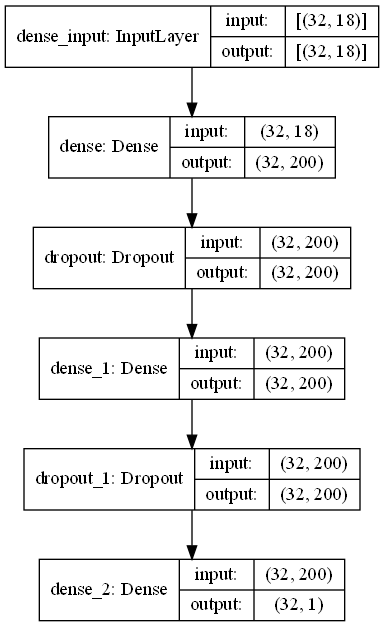

In [65]:
tf.keras.utils.plot_model(model,show_shapes=True)


### Model Evaluation

In [171]:
print('train MSE equals: ',model.evaluate(train_inputs,train_targets))
print('validation MSE equals: ',model.evaluate(validation_inputs,validation_targets))
print('test MSE equals: ',model.evaluate(test_inputs,test_targets))
print('real MSE equals: ',model.evaluate(test_data_scaled,p_scaled))



126/126 [==============================] - 0s 367us/step - loss: 0.4364
train MSE equals:  0.4363775849342346
27/27 [==============================] - 0s 652us/step - loss: 0.4457
validation MSE equals:  0.4457028806209564
28/28 [==============================] - 0s 406us/step - loss: 0.4368
test MSE equals:  0.4367593824863434
94/94 [==============================] - 0s 358us/step - loss: 0.4560
real MSE equals:  0.45601245760917664


In [172]:
train_outputs=model.predict(train_inputs)
validation_outputs=model.predict(validation_inputs)
test_outputs=model.predict(test_inputs)
real_test_outputs=model.predict(test_data_scaled)

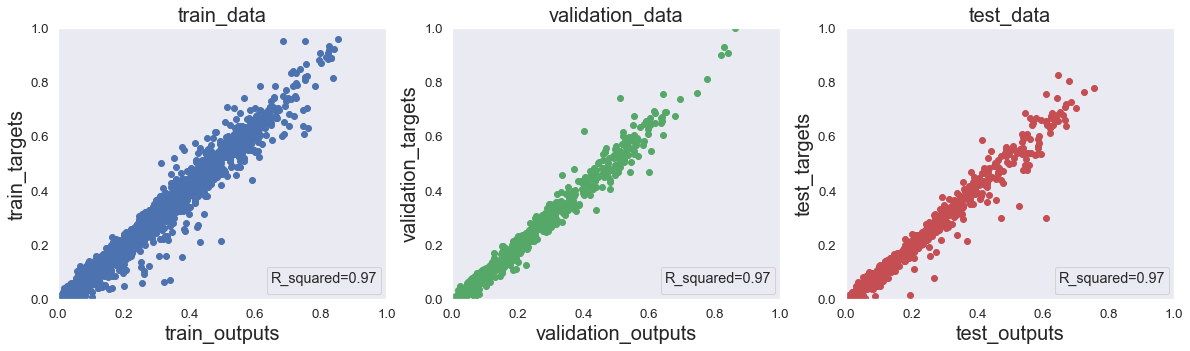

In [173]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.scatter(train_outputs,train_targets,c='b')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_title('train_data',fontsize=20)
ax1.set_xlabel('train_outputs',fontsize=20)
ax1.set_ylabel('train_targets',fontsize=20)
ax1.legend(loc='lower right',title=f'R_squared={r2_score(train_outputs,train_targets).round(2)}',fontsize=10,labels='')
ax1.grid()

ax2.scatter(validation_outputs,validation_targets,c='g')
ax2.set_title('validation_data',fontsize=20)
ax2.set_xlabel('validation_outputs',fontsize=20)
ax2.set_ylabel('validation_targets',fontsize=20)
ax2.legend(loc='lower right',title=f'R_squared={r2_score(validation_outputs,validation_targets).round(2)}',fontsize=10,labels='')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.grid()

ax3.scatter(test_outputs,test_targets,c='r')
ax3.set_title('test_data',fontsize=20)
ax3.set_xlabel('test_outputs',fontsize=20)
ax3.set_ylabel('test_targets',fontsize=20)
ax3.legend(loc='lower right',title=f'R_squared={r2_score(test_outputs,test_targets).round(2)}',fontsize=10,labels='')
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax3.grid()

(0.0, 1.0)

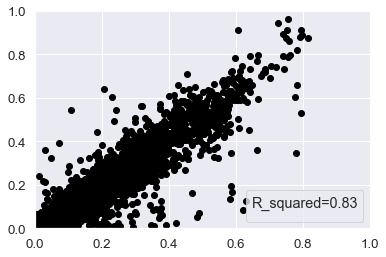

In [174]:
plt.scatter(real_test_outputs,p_scaled,c='black')
plt.legend(loc='lower right',title=f'R_squared={r2_score(real_test_outputs,p_scaled).round(2)}',labels='')
plt.xlim(0,1)
plt.ylim(0,1)

### Root mean square logarithmic error

#### train_data

In [175]:
real_train_outputs= s2.inverse_transform(train_outputs).astype(np.int32)
real_train_targets= s2.inverse_transform(train_targets).astype(np.int32)
real_train_outputs=np.where(real_train_outputs<0,0,real_train_outputs)
mean_squared_log_error(real_train_targets,real_train_outputs)**0.5

0.2727094483531594

In [176]:
sum(real_train_outputs-real_train_targets)

array([324])

#### validation_data

In [177]:
real_validation_outputs= s2.inverse_transform(validation_outputs).astype(np.int32)
real_validation_targets= s2.inverse_transform(validation_targets).astype(np.int32)
real_validation_outputs=np.where(real_validation_outputs<0,0,real_validation_outputs)
mean_squared_log_error(real_validation_targets, real_validation_outputs)**0.5

0.3120058427776272

In [178]:
sum(real_validation_outputs-real_validation_targets)

array([-3186])

#### test_data

In [179]:
real_test_outputs1= s2.inverse_transform(test_outputs).astype(np.int32)
real_test_targets1= s2.inverse_transform(test_targets).astype(np.int32)
real_test_outputs1=np.where(real_test_outputs1<0,0,real_test_outputs1)
mean_squared_log_error(real_test_targets1, real_test_outputs1)**0.5

0.2827184084941666

### Real_data

In [182]:
real_test_outputs2= s2.inverse_transform(real_test_outputs)
real_test_targets2= s2.inverse_transform(p_scaled).astype(np.int32)
real_test_outputs2=np.where(real_test_outputs2<0,0,real_test_outputs2)
mean_squared_log_error(real_test_targets2, real_test_outputs2)**0.5

0.601377577143622

In [75]:
# predictions-=1
# predictions=np.where(predictions<0,0,predictions)
# mean_squared_log_error(p,predictions)**0.5

In [76]:
# plt.figure(figsize=(20,8))
# plt.plot(predictions[:240],c='r')
# plt.plot(p[:240],c='b')

In [77]:
# outputs=s2.inverse_transform(model.predict(scaled_inputs))

# plt.figure(figsize=(20,8))
# plt.plot(outputs[:240],c='r')
# plt.plot(targets_all[:240],c='b')

In [78]:
# plt.figure(figsize=(20,8))
# plt.axhline(y=0,c='r')
# plt.plot(predictions-p.values)

### Residual plot

<AxesSubplot:xlabel='x', ylabel='y'>

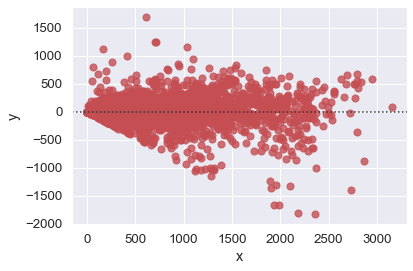

In [80]:
data=pd.DataFrame()
data['x']= np.squeeze(real_test_outputs2)
data['y']= np.squeeze(real_test_targets2)
sns.residplot(x='x',y='y',data=data,lowess=False, color="r",scatter_kws={"s": 50})

### Model Saving

In [ ]:
# model.save('model_1.h5') 

In [ ]:
# model.summary()

In [ ]:
# model = tf.keras.models.load_model('model_1.h5')

### Significance test for neural network model
### Based on partial drivative

In [81]:
names=list(train_data.columns)
names

['Temperature(�C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'month',
 'day_cos',
 'day_sin',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Functioning Day_Yes']

In [82]:
w=[]
b={}
inp=train_inputs
inp = tf.Variable(inp, dtype=tf.float32)

with tf.GradientTape() as tape:
    preds = model(inp)
grads = np.squeeze(tape.gradient(preds, inp))

for i in range(train_data.shape[1]):
    a=sum((grads[:,i])**2)/(train_inputs.shape[0])
    w.append(a.round(5))
for i in range(train_data.shape[1]):
    b[names[i]]=w[i]
print(b)

{'Temperature(�C)': 0.17833, 'Humidity(%)': 0.0583, 'Visibility (10m)': 0.00797, 'Solar Radiation (MJ/m2)': 0.2697, 'Rainfall(mm)': 1.48048, 'month': 0.11896, 'day_cos': 0.11849, 'day_sin': 0.06643, 'day_Monday': 0.00346, 'day_Saturday': 0.0079, 'day_Sunday': 0.01001, 'day_Thursday': 0.00919, 'day_Tuesday': 0.00326, 'day_Wednesday': 0.00495, 'Seasons_Spring': 0.03324, 'Seasons_Summer': 0.005, 'Seasons_Winter': 0.01381, 'Functioning Day_Yes': 0.13869}


In [83]:
t=[(i/sum(w)).round(3) for i in w]
print(t)

[0.071, 0.023, 0.003, 0.107, 0.586, 0.047, 0.047, 0.026, 0.001, 0.003, 0.004, 0.004, 0.001, 0.002, 0.013, 0.002, 0.005, 0.055]


In [84]:
t=[]
for i in w:
    t.append((i/sum(w)).round(3))
print(t)

[0.071, 0.023, 0.003, 0.107, 0.586, 0.047, 0.047, 0.026, 0.001, 0.003, 0.004, 0.004, 0.001, 0.002, 0.013, 0.002, 0.005, 0.055]


C:\Users\mady\anaconda3\envs\mywork\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mady\anaconda3\envs\mywork\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


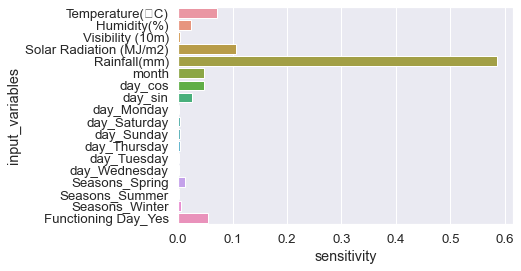

In [85]:
sns.set(font_scale = 1.2)
sns.barplot(x=t,y=names).set(xlabel='sensitivity',ylabel='input_variables')
plt.show()

### Generating predictions

In [101]:
predictions=s2.inverse_transform(model.predict(test_data_scaled))

In [102]:
predictions=predictions.astype(np.int32)

In [103]:
predictions.shape

(3000, 1)

In [104]:
id=list(df_test['ID'])

In [105]:
pred= pd.DataFrame()
pred['ID']=id
pred['y']=predictions
pred

,ID,y
0,5760,5
1,5761,5
2,5762,5
3,5763,4
4,5764,4
...,...,...
2995,8755,7
2996,8756,7
2997,8757,6
2998,8758,6


In [89]:
pred.describe()

,ID,y
count,3000.000000,3000.000000
mean,7259.500000,719.972333
std,866.169729,616.362445
min,5760.000000,0.000000
25%,6509.750000,212.000000
50%,7259.500000,540.500000
75%,8009.250000,1074.000000
max,8759.000000,2854.000000


In [90]:
sum(pred['y']==0)

48

### We have some functioning days=No, Let's replace them by zero

In [91]:
pred['function_day']=df_test['Functioning Day']

In [92]:
pred

,ID,y,function_day
0,5760,215,Yes
1,5761,185,Yes
2,5762,155,Yes
3,5763,102,Yes
4,5764,61,Yes
...,...,...,...
2995,8755,1507,Yes
2996,8756,1201,Yes
2997,8757,1036,Yes
2998,8758,849,Yes


In [93]:
pred['function_day'].value_counts()

Yes    2952
No       48
Name: function_day, dtype: int64

In [94]:
pred['y'][pred['function_day']=='No']=0

<ipython-input-94-e5b94da60080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['y'][pred['function_day']=='No']=0


In [95]:
pred['y'][pred['y']==0].value_counts()

0    48
Name: y, dtype: int64

In [96]:
pred.drop('function_day',axis='columns',inplace=True)

In [97]:
pred

,ID,y
0,5760,215
1,5761,185
2,5762,155
3,5763,102
4,5764,61
...,...,...
2995,8755,1507
2996,8756,1201
2997,8757,1036
2998,8758,849


In [98]:
pred.describe()

,ID,y
count,3000.000000,3000.000000
mean,7259.500000,719.972333
std,866.169729,616.362445
min,5760.000000,0.000000
25%,6509.750000,212.000000
50%,7259.500000,540.500000
75%,8009.250000,1074.000000
max,8759.000000,2854.000000


In [99]:
pred['y']=np.where(pred['y']<0,0,pred['y'])
mean_squared_log_error(p,pred['y'])**0.5

0.591337767223578

In [100]:
p['y'].describe()

count    3000.000000
mean      706.749000
std       624.944351
min         0.000000
25%       199.000000
50%       544.000000
75%      1062.000000
max      3418.000000
Name: y, dtype: float64

### Exporting csv submission file

In [ ]:
# pred.to_csv('subnn.csv',index=False)

In [ ]:
# d1=pd.read_csv('subxg.csv')
# d2=pd.read_csv('sub_rf.csv')
# # d3=pd.read_csv('sub.csv')
# d4=pd.read_csv('subGBM.csv')

In [ ]:
# mean_squared_log_error(p,0.3*pred['y']+0.2*d1['y']+0.1*d2['y']+0.2*d3['y']+0.1*d4['y'])**0.5

In [ ]:
# from scipy.optimize import minimize
# from scipy.optimize import differential_evolution
# from scipy.optimize import dual_annealing
# from scipy.optimize import NonlinearConstraint
# from scipy.optimize import basinhopping
# from scipy.optimize import brute
# import warnings
# warnings.filterwarnings("ignore")
# np.set_printoptions(suppress=True)

In [ ]:
# def objective(x, sign=1.0):  
    
#     x1=x[0]
#     x2=x[1]
#     x3=x[2]
#     x4=x[3]
    

#     return mean_squared_log_error(p,x1*pred['y']**.5+x2*d1['y']**.5+x3*d2['y']**.5+x4*d4['y']**.5)**0.5


# b1 = (0,4.)
# b2 = (0,4.)
# b3 = (0,4.)
# b4 = (0,4.)




# bnds= (b1,b2,b3,b4)


# sol = dual_annealing(objective,bounds=bnds,maxiter=500)


# print(sol)